# TRATAMIENTO DE DATA NO BALANCEADA

In [1]:
#Importando librerías necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns    #Librería Gráfica
import matplotlib.pyplot as plt #Librería Gráfica

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss         #Para llevar a cabo UnderSampling
from imblearn.over_sampling import RandomOverSampler #Para llevar a cabo OverSampling
from imblearn.combine import SMOTETomek              #Para combinar U/O Sampling

import warnings
warnings.filterwarnings('ignore')


In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
fileCSV="Grid v1.csv"
entel=pd.read_csv(fileCSV,sep=",")
entel.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [4]:
entel.shape

(197640, 8)

In [5]:
#Solo consideramos los valores menores a cero en la variable rsrp
entel=entel.loc[entel['rsrp']<0]

In [6]:
entel.shape

(23103, 8)

In [7]:
#Frecuencia por numero de incidentes
pd.value_counts(entel.incidentes)

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64

In [8]:
#Recodificando la target
entel['incidentes']=entel['incidentes'].replace([2,3,4,5,6,7],1)

In [9]:
incidentes_freq=pd.value_counts(entel.incidentes)
incidentes_freq

0    21601
1     1502
Name: incidentes, dtype: int64

In [10]:
incidentes_freq*100/sum(incidentes_freq)

0    93.49868
1     6.50132
Name: incidentes, dtype: float64

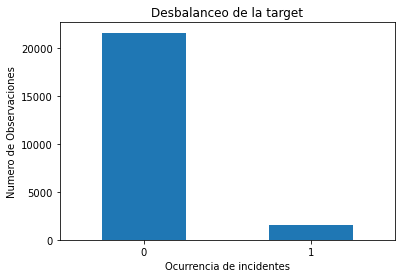

In [11]:
incidentes_freq.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la target')
plt.xlabel('Ocurrencia de incidentes')
plt.ylabel('Numero de Observaciones')
plt.show()

In [12]:
#Extraemos las variables de interes
entel=entel[["rsrp","redireccion","cqi","incidentes"]]
entel.head()

,rsrp,redireccion,cqi,incidentes
14400,-115.7500,884.696988,10.856694,0
14949,-112.7500,381.359613,11.205094,0
15498,-118.3750,713.387431,8.729160,0
16046,-115.3750,307.311721,9.607077,0
16596,-118.1875,1728.576707,9.835512,0


In [13]:
#Debido al filtro incial rsrp<0 los index fueron alterados, se procedera a resetear los index
entel.reset_index(drop=True, inplace=True)
entel.head()

,rsrp,redireccion,cqi,incidentes
0,-115.7500,884.696988,10.856694,0
1,-112.7500,381.359613,11.205094,0
2,-118.3750,713.387431,8.729160,0
3,-115.3750,307.311721,9.607077,0
4,-118.1875,1728.576707,9.835512,0


In [14]:
#Identificando la matriz de datos y la variable target y 
x=entel.iloc[:,0:3].values
y=entel.iloc[:,3].values

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [16]:
#Datos de Entrenamiento DF
xtrain=pd.DataFrame(xtrain,columns=["rsrp","redireccion","cqi"])
ytrain=pd.DataFrame(ytrain,columns=["incidentes"])

entel_entrenamiento=pd.concat([xtrain,ytrain],axis=1)
entel_entrenamiento.head()


,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [17]:
count_classes=pd.value_counts(entel_entrenamiento['incidentes'])
count_classes

0    15121
1     1051
Name: incidentes, dtype: int64

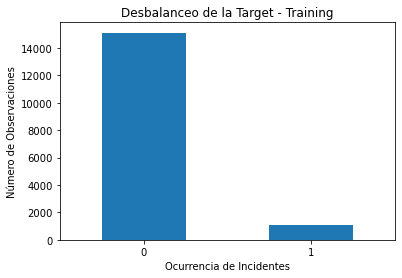

In [18]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Incidentes')
plt.ylabel('Número de Observaciones')
plt.show()

**_UnderSampling_**

In [19]:
#Refrescando el DF
entel_entrenamiento.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [20]:
#Primero creamos una instancia de NearMiss
under=NearMiss(sampling_strategy=0.8, #proporcion de balanceo final
              n_neighbors=11) #numero de vecinos a considerar en la aleatoriedad

In [21]:
type(under)

imblearn.under_sampling._prototype_selection._nearmiss.NearMiss

In [22]:
#fit_resample me arroja 2 objetos ya balanceados
xtrain_under,ytrain_under= under.fit_resample(xtrain,ytrain)

In [23]:
#Datos de Entrenamiento DF
xtrain_under=pd.DataFrame(xtrain_under,columns=["rsrp","redireccion","cqi"])
ytrain_under=pd.DataFrame(ytrain_under,columns=["incidentes"])

entel_entrenamiento_under=pd.concat([xtrain_under,ytrain_under],axis=1)
entel_entrenamiento_under.head()


,rsrp,redireccion,cqi,incidentes
0,-117.4375,0.0,8.256419,0
1,-116.8750,0.0,9.072608,0
2,-117.8125,0.0,7.522146,0
3,-115.7500,0.0,9.074086,0
4,-117.6250,0.0,9.738191,0


In [24]:
count_classes_under=pd.value_counts(entel_entrenamiento_under.incidentes)
count_classes_under

0    1313
1    1051
Name: incidentes, dtype: int64

In [25]:
#Verificando la proporcion entre categorias
prop=round(count_classes_under[1]*100/count_classes_under[0],1)
prop

80.0

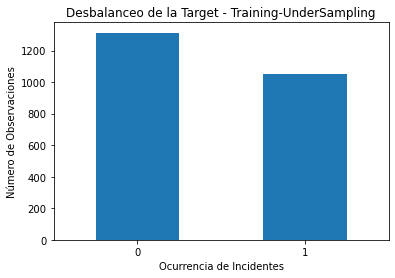

In [26]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes_under.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-UnderSampling')
plt.xlabel('Ocurrencia de Incidentes')
plt.ylabel('Número de Observaciones')
plt.show()

**_OverSampling_**

In [27]:
#Creamos una instancia de RandomOverSampler
over=RandomOverSampler(sampling_strategy=0.8,
                      random_state=2020)#semilla, se pone cualquier numero pero las personas que tengan el mismo numero tendran la data igual

In [28]:
xtrain_over,ytrain_over=over.fit_resample(xtrain,ytrain)

In [29]:
#Datos de Entrenamiento DF
xtrain_over=pd.DataFrame(xtrain_over,columns=["rsrp","redireccion","cqi"])
ytrain_over=pd.DataFrame(ytrain_over,columns=["incidentes"])

entel_entrenamiento_over=pd.concat([xtrain_over,ytrain_over],axis=1)
entel_entrenamiento_over.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [30]:
#Calculando las frecuencias por categoria
count_classes_over=pd.value_counts(entel_entrenamiento_over.incidentes)
count_classes_over

0    15121
1    12096
Name: incidentes, dtype: int64

In [31]:
#Verificando la proporcion 
prop=round(count_classes_over[1]*100/count_classes_over[0],1)
prop

80.0

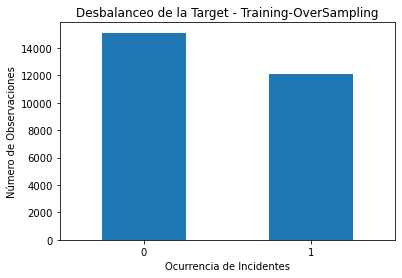

In [32]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes_over.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-OverSampling')
plt.xlabel('Ocurrencia de Incidentes')
plt.ylabel('Número de Observaciones')
plt.show()

**_SMOTE_Tomek_**

In [33]:
st=SMOTETomek(sampling_strategy=0.8,
             random_state=2020)

In [34]:
xtrain_st,ytrain_st=st.fit_resample(xtrain,ytrain)

In [35]:
#Datos de Entrenamiento DF
xtrain_st=pd.DataFrame(xtrain_st,columns=["rsrp","redireccion","cqi"])
ytrain_st=pd.DataFrame(ytrain_st,columns=["incidentes"])

entel_entrenamiento_st=pd.concat([xtrain_st,ytrain_st],axis=1)
entel_entrenamiento_st.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [36]:
#Calculando las frecuencias por categoria
count_classes_st=pd.value_counts(entel_entrenamiento_st.incidentes)
count_classes_st

0    13403
1    10378
Name: incidentes, dtype: int64

In [37]:
#Verificando la proporcion 
prop=round(count_classes_st[1]*100/count_classes_st[0],1)
prop

77.4

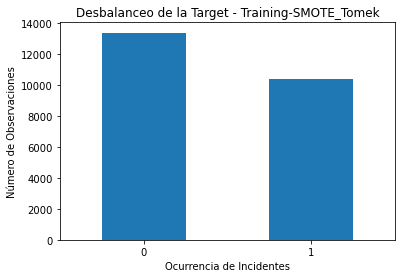

In [38]:
#Graficando el Desbalanceo de la Target en el Training Set 
count_classes_st.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-SMOTE_Tomek')
plt.xlabel('Ocurrencia de Incidentes')
plt.ylabel('Número de Observaciones')
plt.show()

# TEMA 8 DISCRETIZACION DE DATOS

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math
from sklearn.preprocessing import KBinsDiscretizer # Para aplicar Discretizacion

In [40]:
fileCSV="data.csv"
data=pd.read_csv(fileCSV,sep=",")
data.head()

,genero,est_civil,tpers,cal,edad,clase
0,1,3,0,0,40,1
1,1,3,0,3,35,1
2,1,0,0,3,58,1
3,1,3,0,1,44,0
4,1,3,0,0,65,1


**_Discretizacion por intervalos de igual amplitud_**

In [41]:
n=len(data)
k=1+math.log2(n)
k=round(k,0)
k

15.0

In [42]:
#Creando una instancia de KBinsDiscretizer
amplitud=KBinsDiscretizer(n_bins=15,
                         encode='ordinal',
                         strategy='uniform')# uniform por ser intervalos de igual amplitud

In [43]:
nuevo_amplitud=amplitud.fit_transform(data[['edad']])

In [44]:
data['edad_amplitud']=nuevo_amplitud
data['edad_amplitud']=data['edad_amplitud'].astype(np.int64)
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud
0,1,3,0,0,40,1,6
1,1,3,0,3,35,1,5
2,1,0,0,3,58,1,9
3,1,3,0,1,44,0,7
4,1,3,0,0,65,1,10


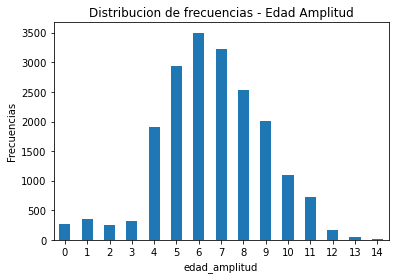

In [45]:
data.groupby(data.edad_amplitud).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Edad Amplitud')
plt.ylabel('Frecuencias')
plt.show()

**_Discretizacion por cuantiles_**

In [46]:
#Creando una instancia de KBinsDiscretizer
cuantil=KBinsDiscretizer(n_bins=4,
                         encode='ordinal',
                         strategy='quantile')# quantile por ser intervalos de igual amplitud

In [47]:
nuevo_cuantil=cuantil.fit_transform(data[['edad']])

In [48]:
data['edad_cuantil']=nuevo_cuantil
data['edad_cuantil']=data['edad_cuantil'].astype(np.int64)
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud,edad_cuantil
0,1,3,0,0,40,1,6,1
1,1,3,0,3,35,1,5,1
2,1,0,0,3,58,1,9,3
3,1,3,0,1,44,0,7,2
4,1,3,0,0,65,1,10,3


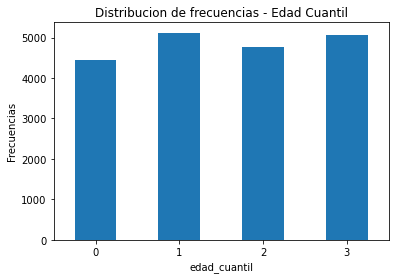

In [49]:
data.groupby(data.edad_cuantil).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Edad Cuantil')
plt.ylabel('Frecuencias')
plt.show()

**_Distribucion por KMeans_**

In [50]:
#Creando una instancia de KBinsDiscretizer
kmeans=KBinsDiscretizer(n_bins=4,
                         encode='ordinal',
                         strategy='kmeans')# quantile por ser intervalos de igual amplitud

In [51]:
nuevo_kmeans=kmeans.fit_transform(data[['edad']])

In [52]:
data['edad_kmeans']=nuevo_kmeans
data['edad_kmeans']=data['edad_kmeans'].astype(np.int64)
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud,edad_cuantil,edad_kmeans
0,1,3,0,0,40,1,6,1,2
1,1,3,0,3,35,1,5,1,1
2,1,0,0,3,58,1,9,3,3
3,1,3,0,1,44,0,7,2,2
4,1,3,0,0,65,1,10,3,3


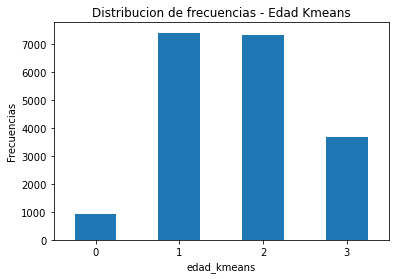

In [53]:
data.groupby(data.edad_kmeans).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Edad Kmeans')
plt.ylabel('Frecuencias')
plt.show()

**_Discretizacion de Entropia_**

In [54]:
from MDLP import MDLP_Discretizer

In [55]:
# Refrescando la data
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud,edad_cuantil,edad_kmeans
0,1,3,0,0,40,1,6,1,2
1,1,3,0,3,35,1,5,1,1
2,1,0,0,3,58,1,9,3,3
3,1,3,0,1,44,0,7,2,2
4,1,3,0,0,65,1,10,3,3


In [56]:
#Estableciendo mi matriz de datos X y target Y
x=data.iloc[:,0:5].values
y=data.iloc[:,5].values

In [58]:
x_obj=[4]
n_predictores=np.array(x_obj)
n_predictores

array([4])

In [59]:
#Instanciando una clase MDLP_Discretizer
discretizer=MDLP_Discretizer(features=n_predictores)

In [60]:
#Aprendiendo
discretizer.fit(x,y)

In [61]:
#Transformando la discretizacion 
x_discretizados=discretizer.transform(x)
x_discretizados

array([[1, 3, 0, 0, 5],
       [1, 3, 0, 3, 5],
       [1, 0, 0, 3, 8],
       ...,
       [2, 2, 1, 4, 5],
       [1, 0, 0, 1, 5],
       [1, 0, 0, 1, 5]], dtype=int64)

In [62]:
#Agregando una nueva columna de edad discretizada por entropia
edad_entropia=x_discretizados[:,4]
data['edad_entropia']=edad_entropia
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud,edad_cuantil,edad_kmeans,edad_entropia
0,1,3,0,0,40,1,6,1,2,5
1,1,3,0,3,35,1,5,1,1,5
2,1,0,0,3,58,1,9,3,3,8
3,1,3,0,1,44,0,7,2,2,5
4,1,3,0,0,65,1,10,3,3,9


# _BONUS_

In [63]:
print('Los puntos de corte para la discretizacion')
print(discretizer._cuts[4])

Los puntos de corte para la discretizacion
[4.5, 7.5, 10.5, 12.5, 17.5, 51.5, 52.5, 53.5, 61.5, 66.5, 68.5, 77.5]


In [64]:
print('Los intervalos para la discretizacion')
print(discretizer._bin_descriptions[4])

Los intervalos para la discretizacion
{0: '-inf_to_4.5', 1: '4.5_to_7.5', 2: '7.5_to_10.5', 3: '10.5_to_12.5', 4: '12.5_to_17.5', 5: '17.5_to_51.5', 6: '51.5_to_52.5', 7: '52.5_to_53.5', 8: '53.5_to_61.5', 9: '61.5_to_66.5', 10: '66.5_to_68.5', 11: '68.5_to_77.5', 12: '77.5_to_inf'}


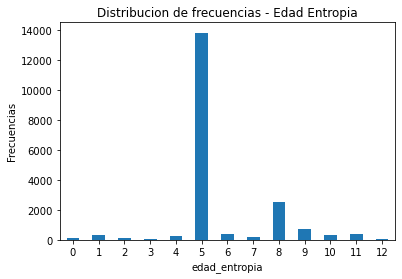

In [65]:
data.groupby(data.edad_entropia).size().plot(kind='bar',rot=0)
plt.title('Distribucion de frecuencias - Edad Entropia')
plt.ylabel('Frecuencias')
plt.show()